In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('./data/college_completion.csv')

In [29]:
#Question 2
#Part 1

print(df.shape)
df.head(10)

# there are 63 columns and 3,798 observations in the data set. some of the variables include index, unitid, chronname, city, state, level, control, basic, hbcu, flagship, etc.

(3798, 63)


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0
5,5,100751,University of Alabama at Tuscaloosa,Tuscaloosa,Alabama,4-year,Public,Research Universities--high research activity,NaN,X,...,61.5,8.5,6.3,5.5,183044|209551|240727|207388|178402|185828|2380...,13,96,75.9|07,NaN,4438.0
6,6,100760,Central Alabama Community College,Alexander City,Alabama,2-year,Public,Associates--Public Rural-serving Medium,NaN,NaN,...,NaN,NaN,NaN,NaN,217712|227225|198491|175935|107460|206923|2407...,25,289,66.7|10,NaN,594.0
7,7,100830,Auburn University at Montgomery,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,NaN,NaN,...,NaN,NaN,NaN,NaN,229814|210429|160038|176965|169798|207263|1023...,13,386,43.8|07,AUM,536.0
8,8,100858,Auburn University,Auburn University,Alabama,4-year,Public,Research Universities--high research activity,NaN,NaN,...,72.2,9.7,2.0,4.6,223232|204024|163268|165334|132903|171128|1961...,13,96,75.5|07,NaN,4165.0
9,9,100937,Birmingham-Southern College,Birmingham,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,174747|153144|143084|152390|168591|199111|1406...,16,252,88.9|07,BSC,449.0


In [30]:
# Part 3

pd.crosstab(df['control'], df['level'])

# from the 2 to 4 year level, private for profit and private not-for profit both increase, especially the private not-for-profit. However, the public level decreases from the 2 to 4 year mark.

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Text(0, 0.5, 'Frequency')

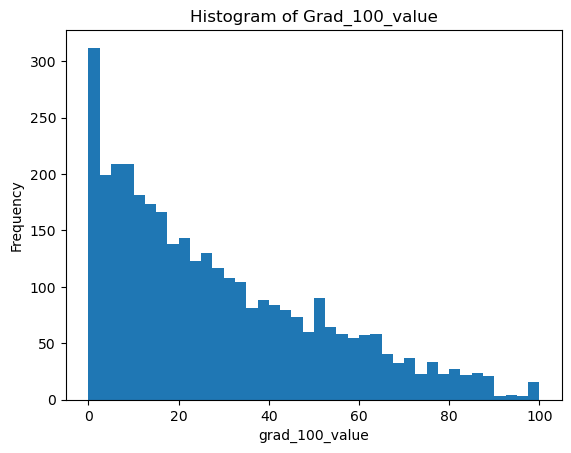

In [31]:
# Part 4: Histogram

df['grad_100_value']=pd.to_numeric(df['grad_100_value'], errors='coerce') #this is because the original histogram had the x-axis labels in a blob
df['grad_100_value'].plot(kind='hist', bins=40, title='Histogram of Grad_100_value') #making the histogram
plt.xlabel('grad_100_value')
plt.ylabel('Frequency') 

Text(0, 0.5, 'Density')

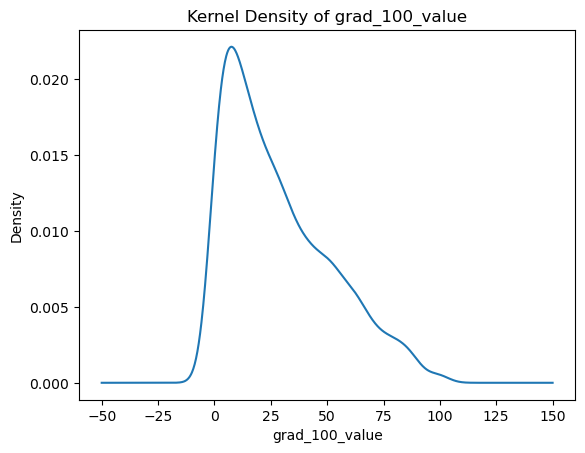

In [32]:
# Kernel Density Plot

df['grad_100_value'].plot.density(title="Kernel Density of grad_100_value")# kernel density plot
plt.xlabel('grad_100_value')
plt.ylabel('Density')

Text(0, 0.5, 'Frequency')

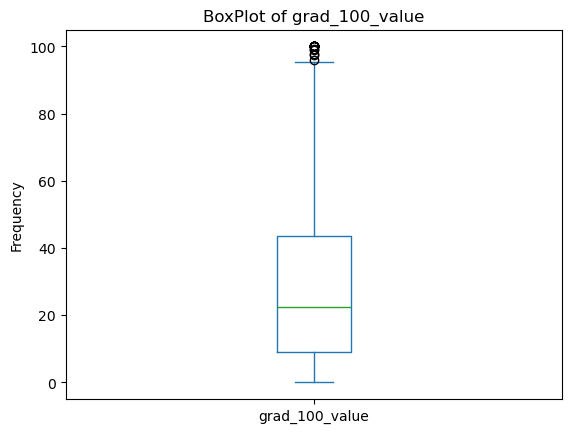

In [33]:
# Boxplot

df['grad_100_value'].plot.box(title="BoxPlot of grad_100_value") #making the boxplot
plt.ylabel('Frequency') # y axis label

In [34]:
# statistical description

descr = df['grad_100_value'].describe() # Describing age and saving it as an object
print(descr,'\n')

# Computing the Variance:
std = descr['std'] # Getting the standard deviation from the description object
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = descr['75%'] # 75 percentile
firstQ = descr['25%'] # 25 percentile
IQR = thirdQ - firstQ # Get the IQR
print('IQR: ', IQR)

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64 

Variance:  543.483382020338 

IQR:  34.650000000000006


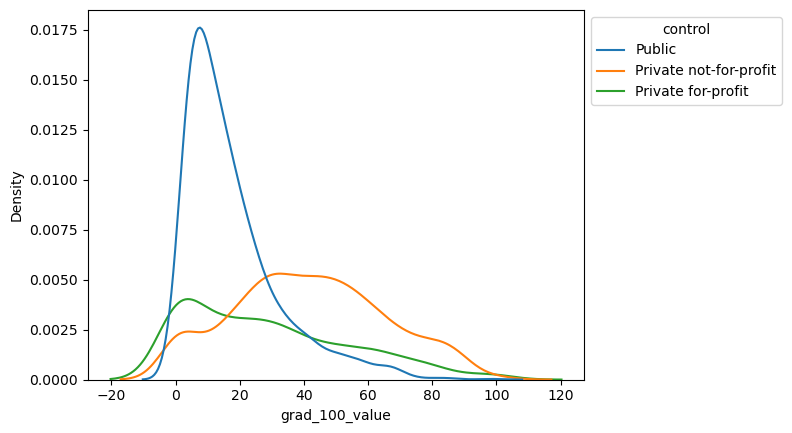

In [39]:
ax = sns.kdeplot(x=df['grad_100_value'], hue= df['control'])
ax = sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#  private not for profit have the best grad rates

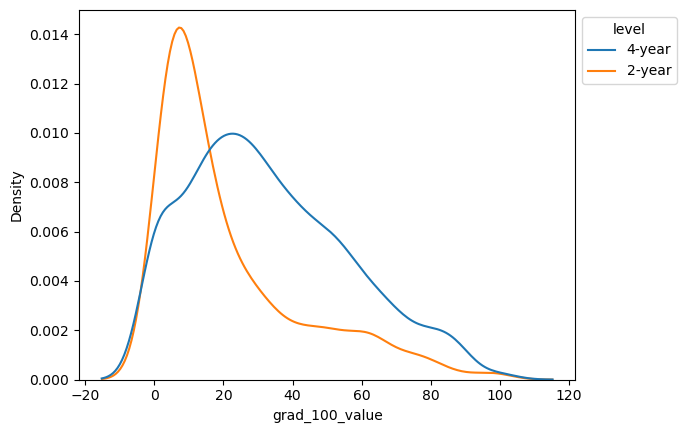

In [40]:
aX = sns.kdeplot(x=df['grad_100_value'], hue= df['level'])
aX = sns.move_legend(aX, "upper left", bbox_to_anchor=(1, 1))

# 4 year institutions have the best grad rates

In [36]:
var2='grad_100_value'
group2='level'
df.loc[:,[group2,var2]].groupby(group2).describe()

#4 year institutions have the best grad rate

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

In [37]:
var3='grad_100_value'
group3='control'
df.loc[:,[group3,var3]].groupby(group3).describe()

# private not-for-profit institutions have the best graduation rate

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

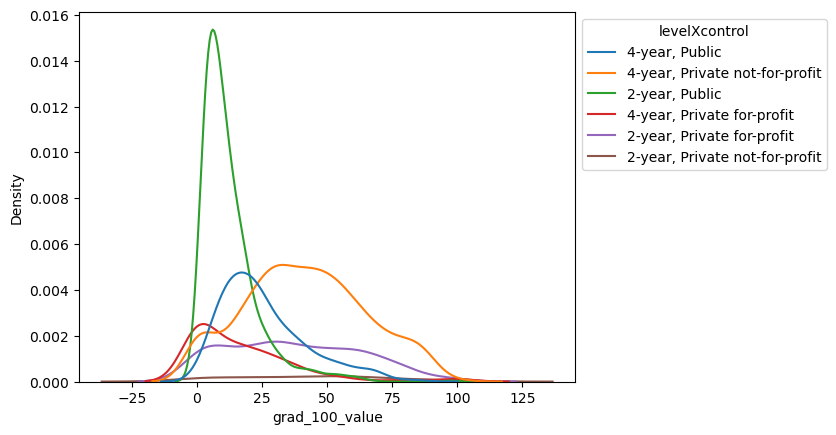

In [38]:
df['levelXcontrol']=df['level']+', '+df['control']

ax = sns.kdeplot(x=df['grad_100_value'], hue= df['levelXcontrol'])
ax = sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# 4 year private not for profit have the best grad rates

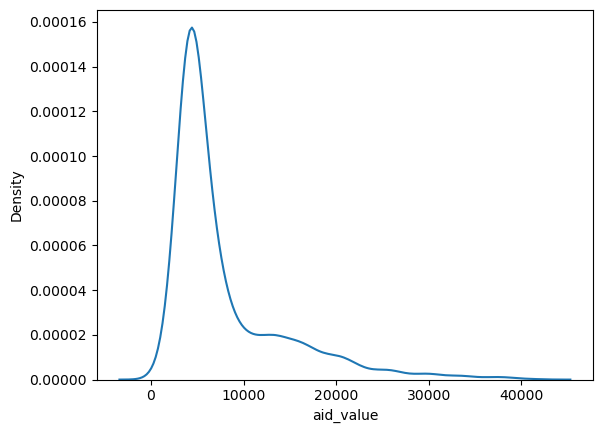

In [42]:
AX = sns.kdeplot(x=df['aid_value'])

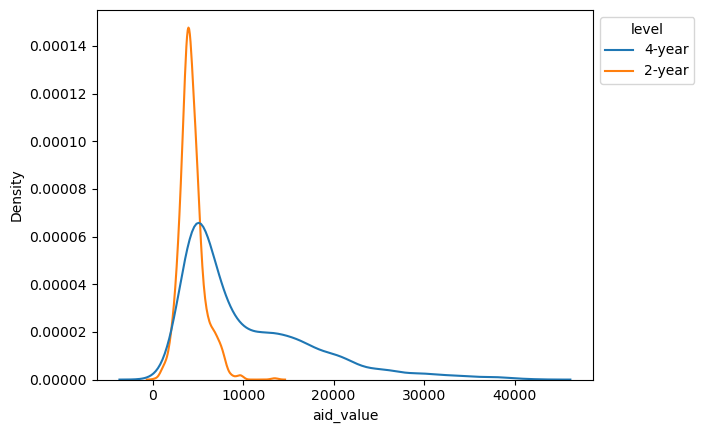

In [43]:
bx = sns.kdeplot(x=df['aid_value'], hue= df['level'])
bx = sns.move_legend(bx, "upper left", bbox_to_anchor=(1, 1))

# people receive more aid at 4 year institutions

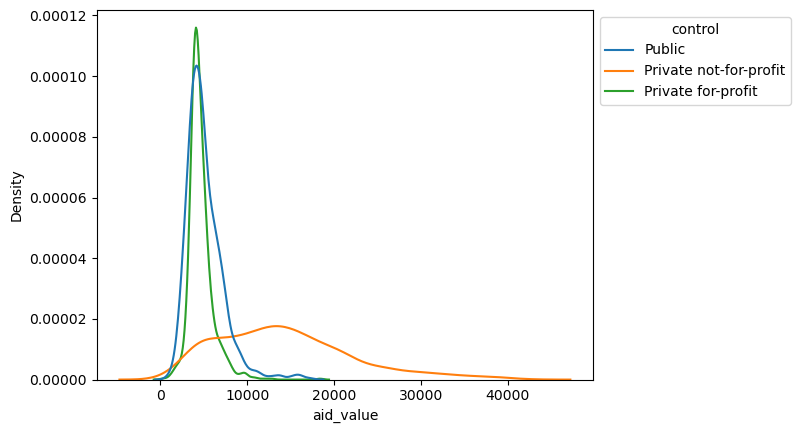

In [44]:
cx = sns.kdeplot(x=df['aid_value'], hue= df['control'])
cx = sns.move_legend(cx, "upper left", bbox_to_anchor=(1, 1))

# people receive more aid at private not for profit schools

In [45]:
var4='aid_value'
group4='control'
df.loc[:,[group4,var4]].groupby(group4).describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [47]:
var5='aid_value'
group5='level'
df.loc[:,[group5,var5]].groupby(group5).describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

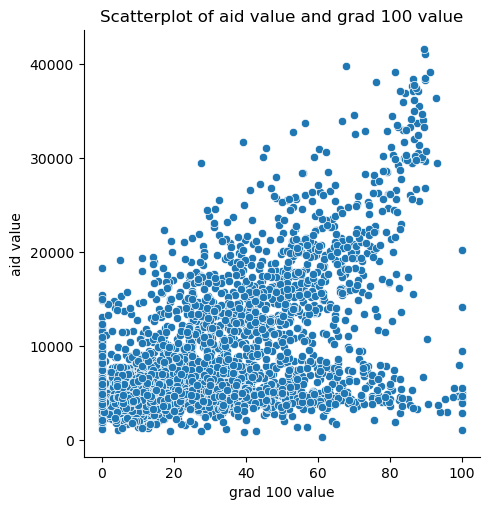

In [48]:
fig = sns.relplot(data = df, x='grad_100_value',y='aid_value') 
fig.set(title="Scatterplot of aid value and grad 100 value", xlabel='grad 100 value', ylabel='aid value')

# aid seems to increase grad value

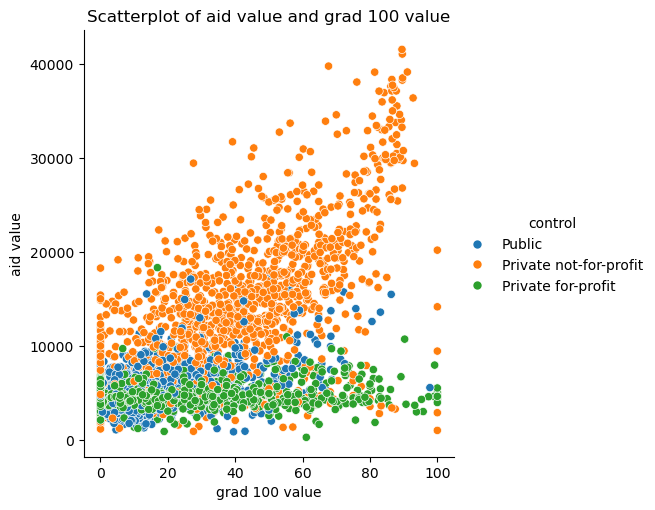

In [50]:
fig = sns.relplot(data = df, x='grad_100_value',y='aid_value', hue='control') 
fig.set(title="Scatterplot of aid value and grad 100 value", xlabel='grad 100 value', ylabel='aid value')

# aid increases grad rates some at public schools and a lot at private not for profit schools

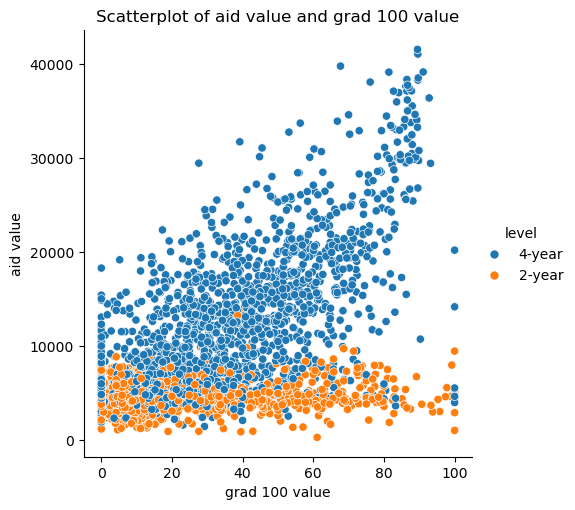

In [51]:
fig = sns.relplot(data = df, x='grad_100_value',y='aid_value', hue='level') 
fig.set(title="Scatterplot of aid value and grad 100 value", xlabel='grad 100 value', ylabel='aid value')
# aid increases grad rates at 4 year schools